In [27]:
!pip install imblearn

In [0]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')
!unzip /content/drive/My\ Drive/data.zip -d /content

Archive:  /content/drive/My Drive/data.zip
  inflating: /content/data/gicsd_labels.csv  
  inflating: /content/data/images/GICSD_8_7_213.png  
  inflating: /content/data/images/GICSD_8_5_173.png  
  inflating: /content/data/images/GICSD_9_3_113.png  
  inflating: /content/data/images/GICSD_9_3_93.png  
  inflating: /content/data/images/GICSD_9_9_293.png  
  inflating: /content/data/images/GICSD_9_0_3.png  
  inflating: /content/data/images/GICSD_9_4_133.png  
  inflating: /content/data/images/GICSD_8_7_233.png  
  inflating: /content/data/images/GICSD_8_8_253.png  
  inflating: /content/data/images/GICSD_9_5_173.png  
  inflating: /content/data/images/GICSD_9_0_13.png  
  inflating: /content/data/images/GICSD_8_9_293.png  
  inflating: /content/data/images/GICSD_9_1_33.png  
  inflating: /content/data/images/GICSD_9_1_53.png  
  inflating: /content/data/images/GICSD_9_5_153.png  
  inflating: /content/data/images/GICSD_8_6_193.png  
  inflating: /content/data/images/GICSD_9_2_73.png  


In [0]:
import os, random
import numpy as np
import pandas as pd
import PIL
import keras
import itertools
from PIL import Image
from botocore.client import Config


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from skimage import feature, data, io, measure
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras import backend as K
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation,BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import types
import pandas as pd

In [91]:
d1 = pd.read_csv("./data/gicsd_labels.csv") 
# Preview the first 5 lines of the loaded data
d2=d1[' LABEL']
k=0
for i in d2:
  #print(i)
  if(i.strip()=='FULL_VISIBILITY'):
    d2[k]=0
  elif(i.strip()=='PARTIAL_VISIBILITY'):
    d2[k]=1
  elif(i.strip()=='NO_VISIBILITY'):
    d2[k]=2
  k=k+1
print(d2.head())
print(d2.tail())
print(d2.unique())
#d1.head()

0    0
1    0
2    1
3    0
4    0
Name:  LABEL, dtype: object
795    2
796    1
797    0
798    0
799    0
Name:  LABEL, dtype: object
[0 1 2]


In [92]:
from glob2 import glob
import pandas as pd


df = pd.DataFrame(columns=["file", "label"])
k=0
for image in glob("data/images/*.png"):
    dir_ = image.split('/')
    file_= dir_[-1]

    df = df.append({
        "file": file_,
        "label": d2[k]
        }, ignore_index=True)
    k=k+1
print(df.head())
df.to_csv('data1.csv', index=False)


                 file label
0   GICSD_33_0_13.png     0
1   GICSD_29_0_13.png     0
2  GICSD_14_6_193.png     1
3   GICSD_48_2_73.png     0
4    GICSD_35_0_3.png     0


In [93]:
data = pd.read_csv('data1.csv')
print(data.head())

                 file  label
0   GICSD_33_0_13.png      0
1   GICSD_29_0_13.png      0
2  GICSD_14_6_193.png      1
3   GICSD_48_2_73.png      0
4    GICSD_35_0_3.png      0


In [0]:
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle
from keras.utils import np_utils


In [0]:
def shuffle_data(data):
    data = shuffle(data)#,random_state=2)
    return data
k=1

In [0]:
root_dir='data/images'

In [0]:
def generator(samples, batch_size=40):
   
    global k
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        samples = shuffle(samples)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]
            # print(batch_samples)
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            # print('debug')
            # For each example
            for i in batch_samples.index:
                # Load image (X) and label (y)
                # print(batch_sample)
                img_name = batch_samples['file'][i]
                # print(img_name)
                label = batch_samples['label'][i]
                img =  cv2.imread(os.path.join(root_dir,img_name))
                # if(k==1):
                #   print('Resized Dimensions : ', img.shape)
                #   cv2.imshow("Resized image", img)  
                #   k=k+1
                # apply any kind of preprocessing
                #print(img.shape())
                # cv2.resize(img, dsize=(192, 192), interpolation=cv2.INTER_LINEAR)
                img = img[:,:,0]
                img.reshape(192,192,1)
                # Add example to arrays
                X_train.append(img)
                y_train.append(label)
                # print('debug')

            # Make sure they're numpy arrays (as opposed to lists)
            # X_train, y_train = smt.fit_sample(X_train, y_train)
            X_train = np.array(X_train)
            y_train = np.array(y_train)
           

            # The generator-y part: yield the next training batch 
            print(X_train,y_train)           
            yield X_train, y_train


In [98]:
k=1
samples=pd.read_csv('data1.csv')
samples.head()
train_datagen = generator(samples,batch_size=40)

x,y = next(train_datagen)


[[[ 60  60  61 ... 208 210 210]
  [ 62  61  60 ... 212 213 213]
  [ 58  58  57 ... 216 216 216]
  ...
  [ 20  20  20 ... 199 199 199]
  [ 19  19  19 ... 199 199 199]
  [ 19  19  19 ... 199 199 199]]

 [[130 132 134 ... 135 133 130]
  [134 134 134 ... 133 132 130]
  [135 134 134 ... 131 133 133]
  ...
  [ 99 100 110 ... 136 149 146]
  [ 94 104 112 ... 137 144 142]
  [102 110 110 ... 139 147 154]]

 [[124 124 124 ... 147 146 144]
  [124 123 123 ... 147 146 143]
  [123 123 123 ... 147 146 144]
  ...
  [101 101 103 ... 152 152 161]
  [ 91  93  95 ... 152 151 156]
  [ 87  88  89 ... 155 155 155]]

 ...

 [[214 210 213 ... 107 105 105]
  [211 211 212 ... 107 106 105]
  [209 214 210 ... 107 105 105]
  ...
  [177 175 174 ... 125 125 125]
  [176 174 173 ... 124 124 124]
  [173 172 169 ... 124 124 124]]

 [[118 119 120 ...   7   7   7]
  [115 116 118 ...   8   8   8]
  [113 115 114 ...   9   9   9]
  ...
  [160 159 160 ... 186 187 189]
  [159 155 158 ... 188 187 189]
  [160 159 160 ... 191 188 1

In [99]:
print ('x_shape: ', x.shape)
print ('labels: ', y)

x_shape:  (40, 192, 192)
labels:  [1 0 1 0 1 0 0 0 0 0 0 2 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

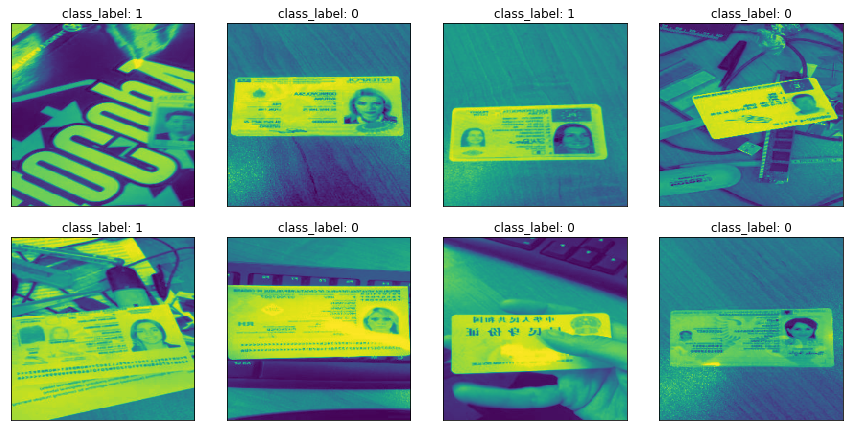

In [100]:
fig = plt.figure(1,figsize=(12,12))
for i in range(8):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  #x[i] = x[i][:,::-1] # converting BGR to RGB
  plt.imshow(x[i][:,::-1], interpolation='none')
  plt.title("class_label: {}".format(y[i]))
  plt.xticks([])
  plt.yticks([])
plt

In [0]:
def preprocessing(img,label):
    resize=192
    img = img[:,:,0]
    img = img.reshape(192,192,1)
    img = img/255
    label = np_utils.to_categorical(label, num_classes=3)
    return img,label

In [0]:
# def data_generator(samples, batch_size=40,shuffle_data=True,resize=192):
    
#     # from google.colab.patches import cv2_imshow
#     num_samples = len(samples)
#     while True: # Loop forever so the generator never terminates
#         samples = shuffle(samples)

#         # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
#         for offset in range(0, num_samples, batch_size):
#             # Get the samples you'll use in this batch
#             batch_samples = samples[offset:offset+batch_size]

#             # Initialise X_train and y_train arrays for this batch
#             X_train = []
#             y_train = []

#             # For each example
#             for i in batch_samples.index:
#                 # Load image (X) and label (y)
#                 img_name = batch_samples['file'][i]
#                 # print(img_name)
#                 label = batch_samples['label'][i]
#                 img =  cv2.imread(os.path.join(root_dir,img_name))
#                 # print('Resized Dimensions : ', img.shape)  
#                 # apply any kind of preprocessing
#                 img,label = preprocessing(img,label)
#                 # print(img.shape)
#                 # Add example to arrays
#                 X_train.append(img)
#                 y_train.append(label)

#             # Make sure they're numpy arrays (as opposed to lists)
#             # X_train, y_train = smt.fit_sample(X_train, y_train)
#             X_train = np.array(X_train)
#             y_train = np.array(y_train)
            

#             # The generator-y part: yield the next training batch            
#             yield X_train, y_train


In [103]:
# train_datagen = data_generator(samples,batch_size=8)

# x,y = next(train_datagen)
# print ('x_shape: ', x.shape)
# print ('labels shape: ', y.shape)
# print ('labels: ', y)

x_shape:  (8, 192, 192, 1)
labels shape:  (8, 3)
labels:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [104]:
# dd=pd.read_csv('data1.csv')
# dd['split'] = np.random.randn(dd.shape[0], 1)
# msk = np.random.rand(len(dd)) <= 0.8

# train = dd[msk]
# test = dd[~msk]
# num_train = len(train)
# num_test = len(test)

# print ('number of train samples: ',num_train )
# print ('number of test samples: ', num_test)

number of train samples:  639
number of test samples:  161


In [169]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout

# input_shape=(192,192,1)
# print (input_shape)

# model = Sequential()
# #filters,kernel_size,strides=(1, 1),padding='valid',data_format=None,dilation_rate=(1, 1),activation=None,use_bias=True,
# #kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=None,bias_regularizer=None,
# #activity_regularizer=None,kernel_constraint=None,bias_constraint=None,

# #pool_size=(2, 2), strides=None, padding='valid',data_format=None

# model.add(Conv2D(32, (3,3),padding='same',activation='relu',input_shape=input_shape,name='conv2d_1'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool2d_1'))
# model.add(Conv2D(32, (3,3),padding='same',activation='relu',name='conv2d_2'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Conv2D(64, (3, 3),activation='relu',name='conv2d_3'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool2d_2'))

# model.add(Dropout(0.5))

# model.add(Conv2D(128, (3, 3),padding='same',activation='relu',name='conv2d_5'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3),padding='same',activation='relu',name='conv2d_6'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(128, (3, 3),padding='same',activation='relu',name='conv2d_7'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))


# model.add(Flatten())
# model.add(Dense(32))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3,activation='sigmoid'))

(192, 192, 1)


In [170]:
# model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 192, 192, 32)      320       
_________________________________________________________________
batch_normalization_46 (Batc (None, 192, 192, 32)      128       
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_47 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
dropout_34 (Dropout)         (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 64)      

In [0]:
# from keras.optimizers import Adam
# opt = Adam(lr=0.0005)
# model.compile(loss='categorical_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])

In [0]:
# batch_size = 40
# train_generator = data_generator(train, batch_size=8)
# validation_generator = data_generator(test, batch_size=8)


In [173]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=num_train // batch_size,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=num_test // batch_size)
# model.save_weights('first_try.h5')

Epoch 1/50
15/15 [==============================] - 5s 314ms/step - loss: 1.2609 - acc: 0.7000 - val_loss: 6.2676 - val_acc: 0.1875
Epoch 2/50
15/15 [==============================] - 0s 33ms/step - loss: 1.0310 - acc: 0.7250 - val_loss: 5.4301 - val_acc: 0.1875
Epoch 3/50
15/15 [==============================] - 0s 33ms/step - loss: 1.7567 - acc: 0.7417 - val_loss: 5.9546 - val_acc: 0.2500
Epoch 4/50
15/15 [==============================] - 0s 33ms/step - loss: 0.9841 - acc: 0.6000 - val_loss: 3.2484 - val_acc: 0.3750
Epoch 5/50
15/15 [==============================] - 1s 34ms/step - loss: 1.2873 - acc: 0.6750 - val_loss: 4.5035 - val_acc: 0.1562
Epoch 6/50
15/15 [==============================] - 0s 33ms/step - loss: 0.8548 - acc: 0.7154 - val_loss: 3.8999 - val_acc: 0.1600
Epoch 7/50
15/15 [==============================] - 0s 33ms/step - loss: 0.9196 - acc: 0.6083 - val_loss: 2.4407 - val_acc: 0.4375
Epoch 8/50
15/15 [==============================] - 1s 34ms/step - loss: 0.7194 - 